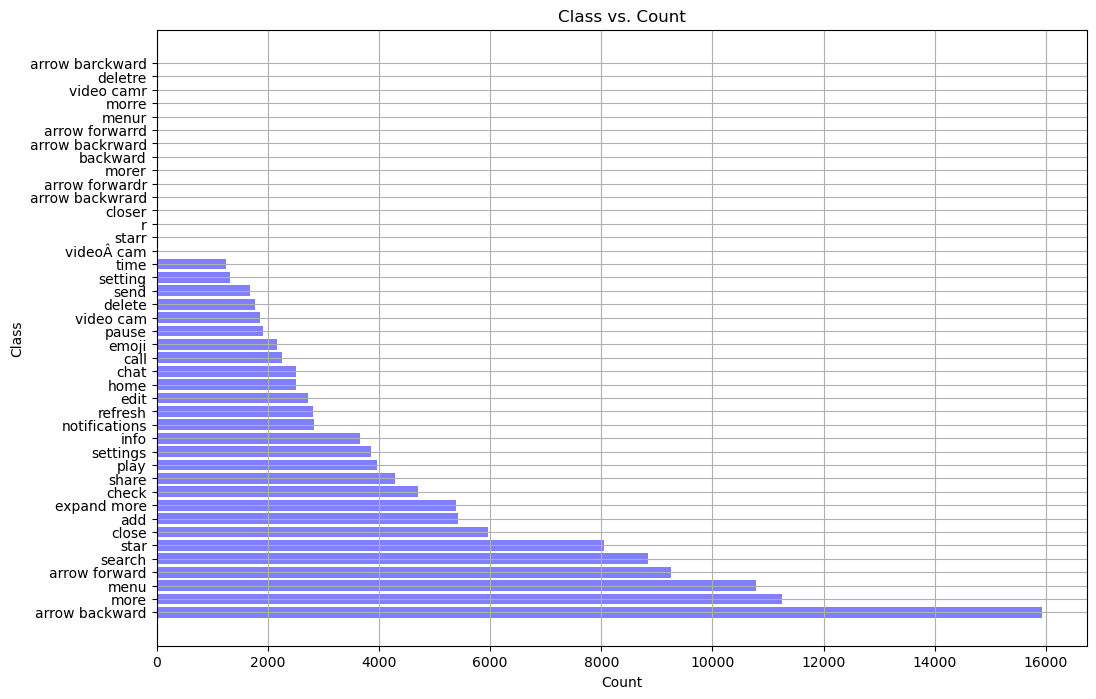

In [1]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


def calculate_aspect_ratio(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    return width / height


json_directory = r"F:\prism\Final_Prism_Dataset\json - Copy"


class_counts = defaultdict(int)


for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        json_path = os.path.join(json_directory, filename)
       
        
        with open(json_path, 'r') as f:
            data = json.load(f)
       
        
        if 'outputs' in data and 'object' in data['outputs']:
            
            labels = [item['name'].strip() for item in data['outputs']['object']]
       
            
            for label in labels:
                class_counts[label] += 1


sorted_classes = sorted(class_counts.keys(), key=lambda x: class_counts[x], reverse=True)
sorted_counts = [class_counts[label] for label in sorted_classes]


plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(sorted_classes)), sorted_counts, alpha=0.5, color='blue')


plt.yticks(np.arange(len(sorted_classes)), sorted_classes)
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Class vs. Count')

plt.grid(True)
plt.show()
